In [1]:
import time
import warnings
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)

- "Load More" 버튼을 3회 눌러서 총 100건의 데이터가 보이게 하기

In [3]:
for i in range(3):
    driver.find_element(By.ID, 'load-more-trigger').click()
    time.sleep(3)

- 글 내용을 펼치는 아이콘 누르기
    - 스포일러(class="expander-icon-wrapper spoiler-warning__control")
    - 긴 글(class="expander-icon-wrapper show-more__control")

In [4]:
divs = driver.find_elements(By.CSS_SELECTOR, '.lister-item.mode-detail.imdb-user-review')
count = 0
for div in divs:
    try:
        div.find_element(By.CSS_SELECTOR, '.expander-icon-wrapper').click()
        time.sleep(1)
        count += 1
    except:
        continue

In [5]:
len(divs), count

(100, 57)

- 화면이 모두 펼쳐지면 BeautifulSoup으로 크롤링

In [6]:
soup = BeautifulSoup(driver.page_source, 'html.parser') 
divs = soup.select('.lister-list > div')
len(divs)

100

In [7]:
driver.close()

In [8]:
div = divs[0]
score = div.select_one('.rating-other-user-rating > span').get_text().strip()
score       # 값이 지정되지 않은 글도 있음

'10'

In [9]:
title = div.select_one('.title').get_text().strip() 
title

"Some birds aren't meant to be caged."

In [10]:
content = div.select_one('.text.show-more__control').get_text().strip() 
content

'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

- 모든 데이터 수집하기

In [11]:
score_list, title_list, content_list = [], [], []
for i, div in enumerate(divs):
    try:
        score = div.select_one('.rating-other-user-rating > span').get_text().strip()
        score_list.append(float(score))
    except:
        score_list.append(np.nan)   # 값이 없으면 결측치로 만듦
        #print(i, end=' ')
    title = div.select_one('.title').get_text().strip()
    content = div.select_one('.text.show-more__control').get_text().strip()
    title_list.append(title)
    content_list.append(content)

In [12]:
len(score_list), len(title_list), len(content_list)

(100, 100, 100)

In [13]:
df = pd.DataFrame({
    'score':score_list, 'title':title_list, 'content':content_list
})
df.tail()

,score,title,content
95,7.0,"Good movie, but best of all time? Hardly . . .",I was a little surprised at first to see this ...
96,10.0,Hope is a dangerous thing,'The Shawshank Redemption'... hmm where do I s...
97,10.0,I didn't think films could be this good....,The Shawshank Redemption came out in 1994 and ...
98,9.0,10 out of 10,Don't want to say any words about this film. J...
99,8.0,Freeman gives it depth,Andy Dufresne (Tim Robbins) is a banker convic...


In [14]:
df.score.mean(), df.score.min(), df.score.max()

(9.659090909090908, 7.0, 10.0)

- Word Cloud 만들기

In [15]:
reviews = ''
for i in df.index:
    reviews += df.title[i] + '\n' + df.content[i] + '\n'

In [16]:
from PIL import Image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [17]:
sw_wc = STOPWORDS
for i in 'movie,film,story,one'.split(','):
    sw_wc.add(i)
wc = WordCloud(background_color='white', max_words=1000,
               stopwords=sw_wc).generate(reviews)

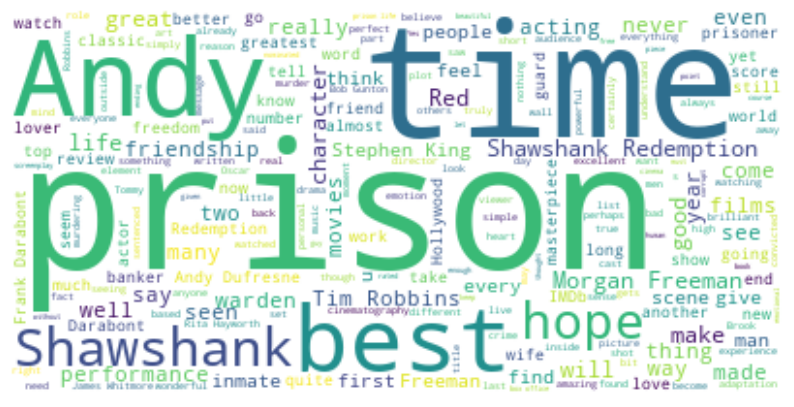

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [19]:
# 사용빈도 Top 10
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

prison:	1.0
time:	0.8
Andy:	0.7696969696969697
best:	0.5454545454545454
Shawshank:	0.5333333333333333
hope:	0.503030303030303
Shawshank Redemption:	0.4121212121212121
good:	0.3939393939393939
character:	0.3878787878787879
make:	0.3878787878787879
